In [117]:
!pip install mysql-connector-python

In [215]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
import mysql.connector
from mysql.connector import Error

In [219]:
# Extract data
hdbdata = pd.read_csv('price-range-of-hdb-flats-offered.csv')
hdbdata_df= pd.DataFrame(hdbdata)
hdbdata_df.head()

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,82000,107000,0,0
1,2008,Punggol,3-room,135000,211000,0,0
2,2008,Punggol,4-room,223000,327000,0,0
3,2008,Punggol,5-room,305000,428000,0,0
4,2008,Jurong West,3-room,142000,160000,0,0


In [217]:
hdbdata_df.dtypes

financial_year                     int64
town                              object
room_type                         object
min_selling_price                  int64
max_selling_price                  int64
min_selling_price_less_ahg_shg     int64
max_selling_price_less_ahg_shg     int64
dtype: object

In [220]:
# Drop columns and transform datatypes
hdbdata_df.drop(['min_selling_price_less_ahg_shg','max_selling_price_less_ahg_shg'], axis =1, inplace=True)
hdbdata_df['financial_year'] = pd.to_datetime(hdbdata_df['financial_year'], format='%Y').dt.year
hdbdata_df.head()

,financial_year,town,room_type,min_selling_price,max_selling_price
0,2008,Punggol,2-room,82000,107000
1,2008,Punggol,3-room,135000,211000
2,2008,Punggol,4-room,223000,327000
3,2008,Punggol,5-room,305000,428000
4,2008,Jurong West,3-room,142000,160000


In [221]:
# Check for null/ missing/0 values
print(f'Presence of null values:',hdbdata_df.isnull().values.any())
print(f'Presence of 0 values:',hdbdata_df.isin([0]).any().any())

Presence of null values: False
Presence of 0 values: True


In [222]:
# Drop rows with 0 values
hdbdata_df_dropped = hdbdata_df[(hdbdata_df != 0).all(axis=1)]
(hdbdata_df_dropped == 0).sum(axis=0)

financial_year       0
town                 0
room_type            0
min_selling_price    0
max_selling_price    0
dtype: int64

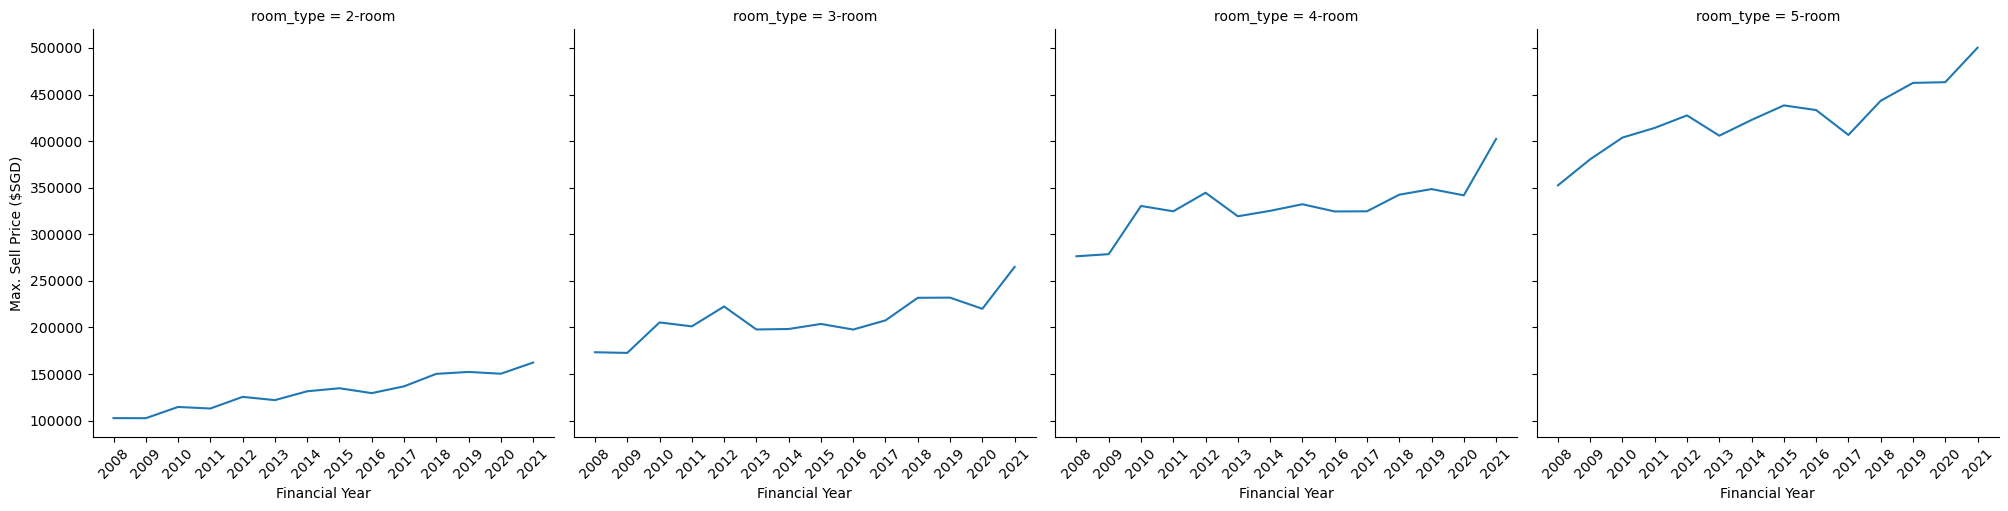

In [170]:
# Plot line graph (max. selling price)
g = sns.relplot(data = hdbdata_df_dropped, x = 'financial_year', y='max_selling_price', kind="line", col="room_type",errorbar=None)
g.set_xlabels('Financial Year')
g.set_ylabels('Max. Sell Price ($SGD)')
plt.xticks(range(2008, 2022))
g.set_xticklabels(rotation=45)
g.axes[0][4].remove()
plt.show()

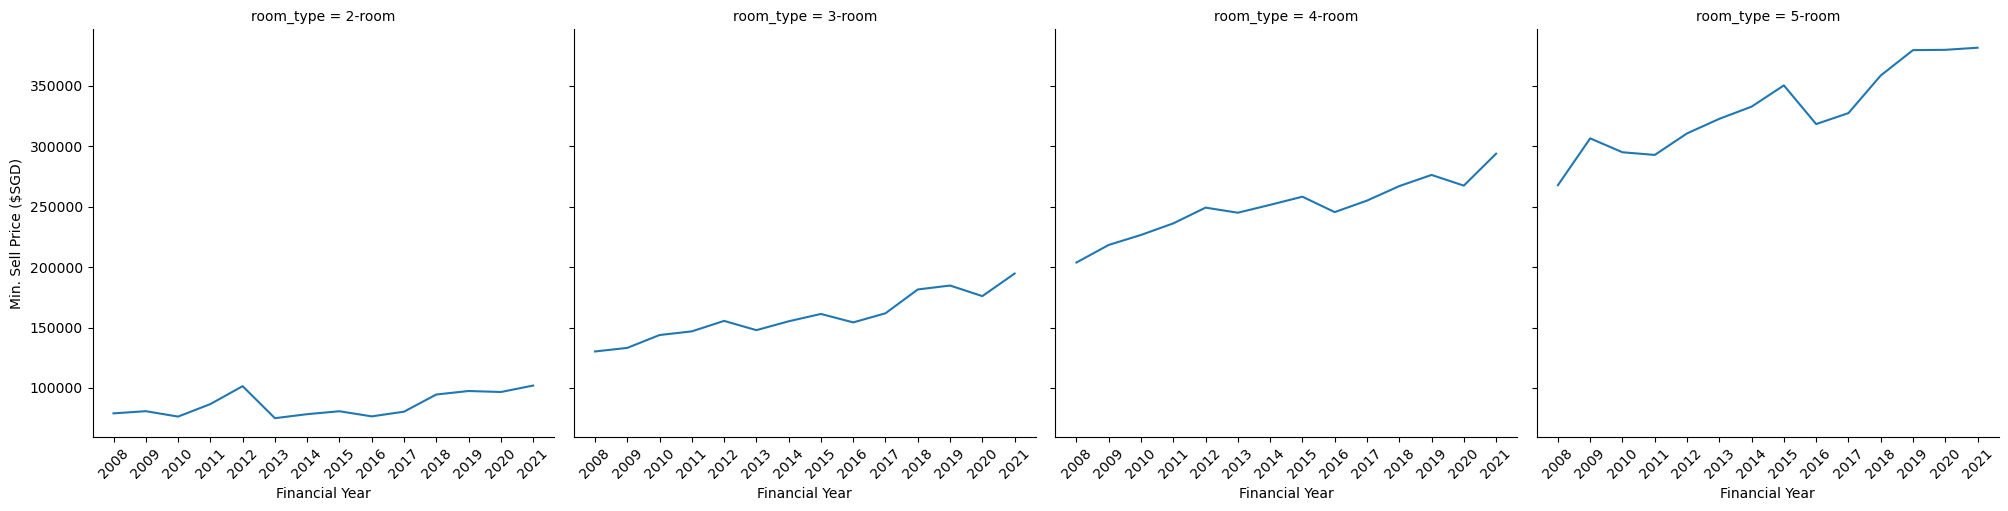

In [171]:
# Plot line graph (min. selling price)
g = sns.relplot(data = hdbdata_df_dropped, x = 'financial_year', y='min_selling_price', kind="line", col="room_type",errorbar=None)
g.set_xlabels('Financial Year')
g.set_ylabels('Min. Sell Price ($SGD)')
plt.xticks(range(2008, 2022))
g.set_xticklabels(rotation=45)
g.axes[0][4].remove()
plt.show()

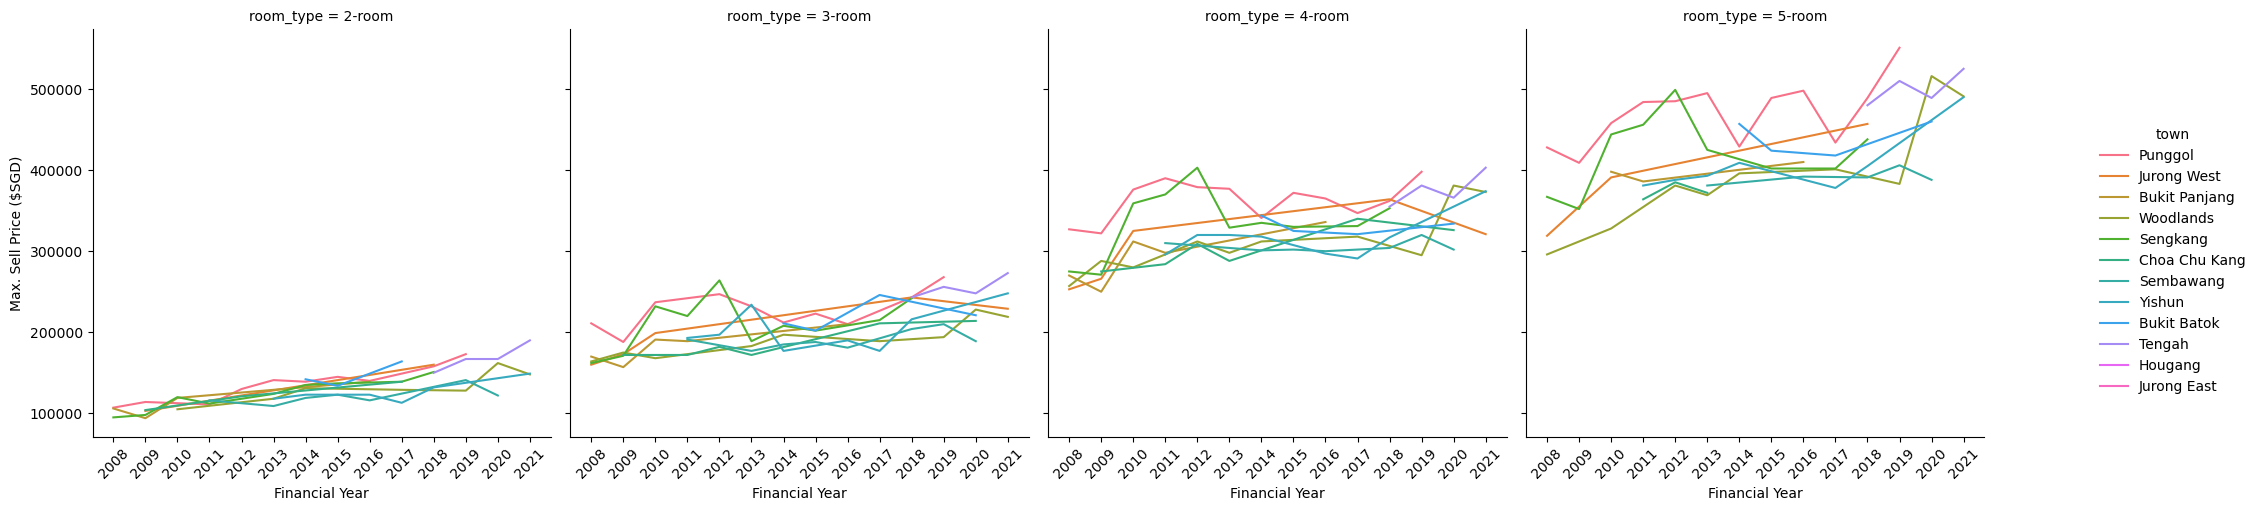

In [172]:
# Plot line graph for each town (max. selling price)
g = sns.relplot(data = hdbdata_df_dropped, x = 'financial_year', y='max_selling_price', kind="line", hue="town", col="room_type")
g._legend.set_bbox_to_anchor([0.85,0.5])
g.set_xlabels('Financial Year')
g.set_ylabels('Max. Sell Price ($SGD)')
plt.xticks(range(2008, 2022))
g.set_xticklabels(rotation=45)
g.axes[0][4].remove()
plt.show()

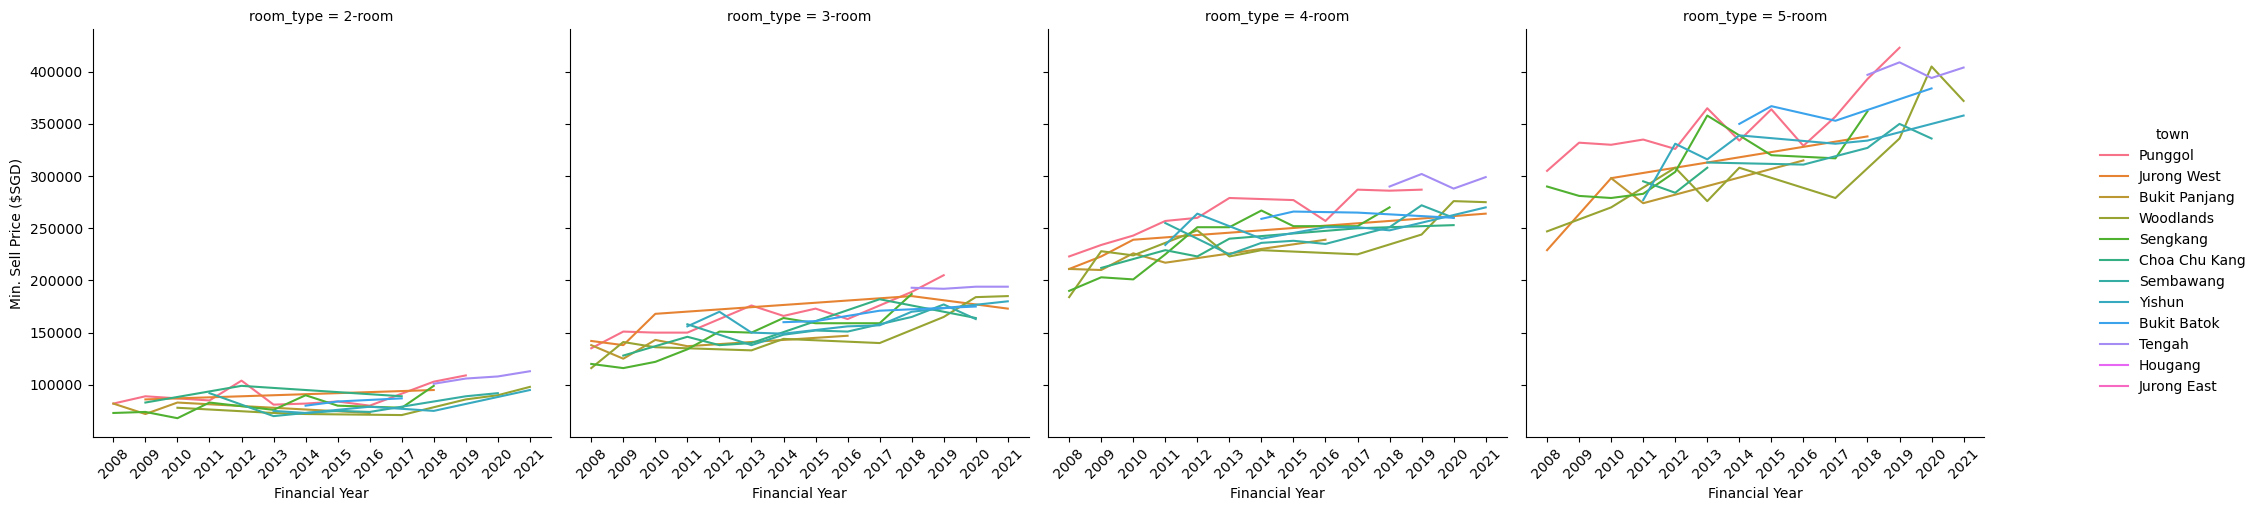

In [174]:
# Plot line graph for each town (min. selling price)
g = sns.relplot(data = hdbdata_df_dropped, x = 'financial_year', y='min_selling_price', kind="line", hue="town", col="room_type")
g._legend.set_bbox_to_anchor([0.85,0.5])
g.set_xlabels('Financial Year')
g.set_ylabels('Min. Sell Price ($SGD)')
plt.xticks(range(2008, 2022))
g.set_xticklabels(rotation=45)
g.axes[0][4].remove()
plt.show()

In [223]:
# Connect to mySQL database
try:
    connection = mysql.connector.connect(
        host='localhost',      # replace with your host
        database='housingprice',    # replace with your database name
        user='root',  # replace with your username
        password='Bentley@2021%%%'  # replace with your password
    )

    if connection.is_connected():
        print("Connection established successfully!")
except Error as e:
    print(f"Error while connecting to MySQL: {e}")

Connection established successfully!


In [224]:
try:
    cursor = connection.cursor()
    
    # Define the INSERT statement
    insert_query = "INSERT INTO bto (financial_year, town, room_type, min_selling_price, max_selling_price) VALUES (%s, %s, %s, %s, %s)"

    # Insert data from DataFrame
    for row in hdbdata_df.itertuples(index=False):
        cursor.execute(insert_query, (row.financial_year, row.town, row.room_type, row.min_selling_price, row.max_selling_price))

    # Commit the changes
    connection.commit()

    print("Data loaded successfully into MySQL table.")

except Error as e:
    print(f"Error loading data into MySQL table: {e}")

finally:
    # Close the cursor and connection
    cursor.close()
    connection.close()


Data loaded successfully into MySQL table.
